### **Load a small slice**

In [1]:
from pprint import pprint
from datasets import load_dataset

In [2]:
DATASET_NAME = "weights-and-wires/pasketti"
SPLIT = "train"

In [3]:
ds = load_dataset(DATASET_NAME, split=SPLIT, streaming=True)

Resolving data files:   0%|          | 0/27 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/27 [00:00<?, ?it/s]

In [4]:
sample = next(iter(ds))

In [5]:
pprint({k: v for k, v in sample.items() if k != "audio"})
print("Audio keys:", sample["audio"])
print("Waveform shape:", sample["audio"]["array"].shape)
print("Sample rate:", sample["audio"]["sampling_rate"])

{'age_bucket': '8-11',
 'audio_duration_sec': 1.92,
 'audio_path': 'audio/U_00003c3ae1c35c6f.flac',
 'child_id': 'C_c74bfde2cca8d5da',
 'filesize_bytes': 30672,
 'md5_hash': '9214be45ba2928dd57384f3c7ee54236',
 'orthographic_text': 'hm',
 'session_id': 'S_7d821c3e4d3bc616',
 'utterance_id': 'U_00003c3ae1c35c6f'}
Audio keys: <datasets.features._torchcodec.AudioDecoder object at 0x11bdb43e0>
Waveform shape: (30720,)
Sample rate: 16000


In [6]:
ds_small = load_dataset(DATASET_NAME, split="train[:500]")

Resolving data files:   0%|          | 0/27 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/27 [00:00<?, ?it/s]

### **Understanding labels**
> Single words or short utterances

In [7]:
import pandas as pd

In [8]:
df = ds_small.to_pandas().drop(columns=["audio"])
df

,utterance_id,child_id,session_id,audio_path,audio_duration_sec,age_bucket,md5_hash,filesize_bytes,orthographic_text
0,U_00003c3ae1c35c6f,C_c74bfde2cca8d5da,S_7d821c3e4d3bc616,audio/U_00003c3ae1c35c6f.flac,1.920,8-11,9214be45ba2928dd57384f3c7ee54236,30672,hm
1,U_00003db24218ffe4,C_c74bfde2cca8d5da,S_e6103ab3a4538d71,audio/U_00003db24218ffe4.flac,12.737,8-11,fe761bb3d034530ef05163c7ad98ec3e,180942,yeah its pouring the water on the screen but t...
2,U_0001a0d0a3b4d816,C_4d0e1c16566d65a2,S_179057c3c3ccdecf,audio/U_0001a0d0a3b4d816.flac,11.556,8-11,b05073e65a98368fccbe777b5ab35e02,208352,it got water and sunlight but the plant did di...
3,U_00021d201a31d313,C_3b51c8b1d2c076d8,S_90720887e4430996,audio/U_00021d201a31d313.flac,1.125,8-11,9ed95318724ae6a2d1ce95d6aa743f6b,27099,there is wires
4,U_0003537f2bc1eb0b,C_b50216b3c70ca0a2,S_5b0bb48fadd7f802,audio/U_0003537f2bc1eb0b.flac,1.125,8-11,f3142751c6a52e2c24a85a4544fe8a0f,18476,good
...,...,...,...,...,...,...,...,...,...
495,U_0160268f8ab7790a,C_388ff057477baaa5,S_561ca52772d86145,audio/U_0160268f8ab7790a.flac,26.786,8-11,9f13e672e8dee507c5b1506693b5fbd6,372991,how it reflects the objects in the room is whe...
496,U_01603f91b222d3cb,C_8439369d08b56467,S_16b1beccdd99911f,audio/U_01603f91b222d3cb.flac,3.686,8-11,1f331155b15f5939b1c9744ab3fb6792,64477,it depends on what kind of food
497,U_0161559ca1ca7c9d,C_79eb61c13e8641d8,S_17fc9f85ab3dba6c,audio/U_0161559ca1ca7c9d.flac,5.969,8-11,9647b94c2b6b5121c450a1e9387089ee,97509,the two bottom ones the fungi and bacteria
498,U_01619940b5595e88,C_813b227d4491672f,S_89a76120b858a300,audio/U_01619940b5595e88.flac,4.766,8-11,8fcd465fd21933727ac8a92f7cc28252,74736,um we were measuring with milliliters


### **Audio duration distribution**

In [9]:
import matplotlib.pyplot as plt

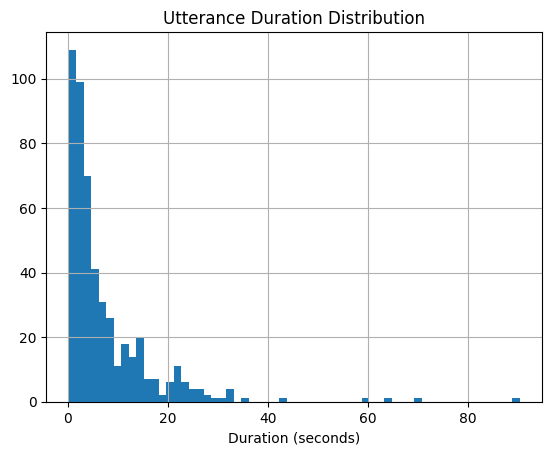

In [10]:
df["audio_duration_sec"].hist(bins=60)
plt.xlabel("Duration (seconds)")
plt.title("Utterance Duration Distribution")
plt.show()

In [11]:
print(df["audio_duration_sec"].describe())
print("Clips under 0.5s:", (df["audio_duration_sec"] < 0.5).sum())
print("Clips over 3s:", (df["audio_duration_sec"] > 3).sum())

count    500.000000
mean       7.297544
std        9.187960
min        0.200000
25%        1.894500
50%        4.160000
75%        9.184250
max       90.319000
Name: audio_duration_sec, dtype: float64
Clips under 0.5s: 8
Clips over 3s: 304


### **Breakdown by age bucket**

In [12]:
print(df["age_bucket"].value_counts())

age_bucket
8-11    391
5-7      55
3-4      54
Name: count, dtype: int64


### **Waveforms**

In [13]:
import random
import numpy as np
import IPython.display as ipd

In [14]:
def plot_sample(sample):
    audio = sample["audio"]
    print("Text:", sample["orthographic_text"])
    print("Age:", sample["age_bucket"])
    ipd.Audio(audio["array"], rate=audio["sampling_rate"])

    plt.figure(figsize=(12, 3))
    plt.plot(audio["array"])
    plt.title(f"\"{sample['orthographic_text']}\" — {sample['age_bucket']}")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.show()

Text: she is exercising
Age: 8-11


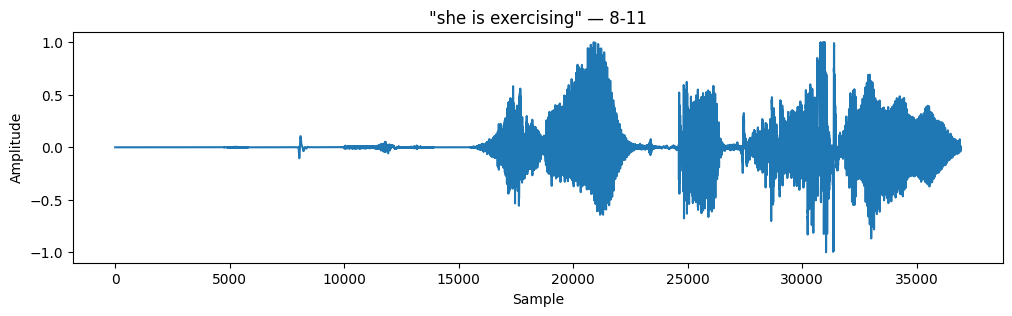

In [15]:
sample = ds_small[random.randint(0, len(ds_small) - 1)]
plot_sample(sample)

Text: he angry
Age: 3-4


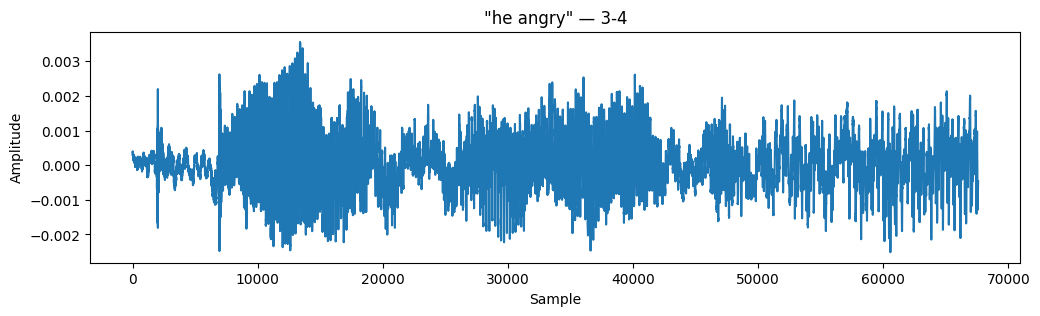

In [16]:
sample = ds_small[random.randint(0, len(ds_small) - 1)]
plot_sample(sample)

Text: nope nothing
Age: 8-11


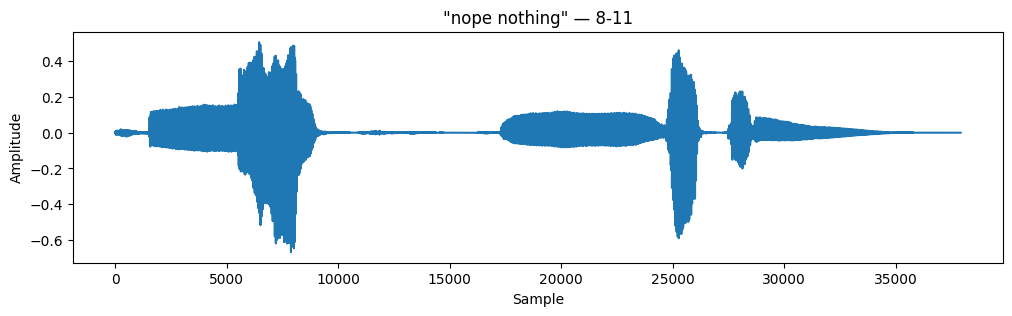

In [17]:
sample = ds_small[random.randint(0, len(ds_small) - 1)]
plot_sample(sample)

### **Silence/Energy check**

A lot of ASR failure comes from bad clips, too much leading/trailing silence or near silence throughout.

In [18]:
import io
import librosa

In [19]:
def rms_energy(waveform):
    return np.sqrt(np.mean(waveform ** 2))

In [20]:
def decode_and_get_rms(audio_dict):
    try:
        audio_bytes = audio_dict.get("bytes")
        if audio_bytes is None:
            return np.nan
        
        y, sr = librosa.load(io.BytesIO(audio_bytes), sr=None)
        return rms_energy(y)
    except Exception as e:
        print(f"Error decoding {audio_dict.get('path')}: {e}")
        return np.nan

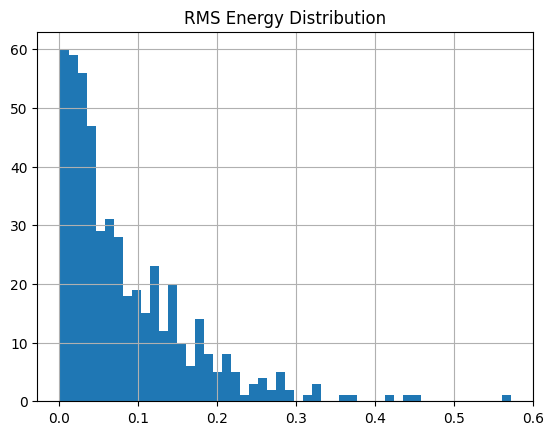

Very quiet clips: 55


In [21]:
df_full = ds_small.to_pandas()  # keep audio column this time
df_full["rms"] = df_full["audio"].apply(decode_and_get_rms)

df_full["rms"].hist(bins=50)
plt.title("RMS Energy Distribution")
plt.show()

# Flag potential bad clips
print("Very quiet clips:", (df_full["rms"] < 0.01).sum())

### **Problem 1: Gain/Volume normalization**

Compare peak amplitude vs RMS to separate truly quiet clips from normally-recorded ones

In [22]:
df_full.columns

Index(['utterance_id', 'child_id', 'session_id', 'audio_path',
       'audio_duration_sec', 'age_bucket', 'md5_hash', 'filesize_bytes',
       'orthographic_text', 'audio', 'rms'],
      dtype='str')

In [23]:
def audio_stats(waveform):
    rms = np.sqrt(np.mean(waveform ** 2))
    peak = np.max(np.abs(waveform))

    # crest factor:
    # - high value = sparse signal (mostly silence)
    # - low value = consistently loud
    crest_factor = peak / (rms + 1e-9)
    return pd.Series({
        "rms": rms,
        "peak": peak,
        "crest_factor": crest_factor
    })

In [24]:
def get_crest_factor(audio_dict):
    try:
        audio_bytes = audio_dict.get("bytes")
        if audio_bytes is None:
            return np.nan
        
        y, sr = librosa.load(io.BytesIO(audio_bytes), sr=None)
        return audio_stats(y)
    except Exception as e:
        print(f"Error decoding {audio_dict.get('path')}: {e}")
        return np.nan

In [25]:
stats = df_full["audio"].apply(get_crest_factor)
df_full = df_full.join(stats[["peak", "crest_factor"]])

In [26]:
df_full.columns

Index(['utterance_id', 'child_id', 'session_id', 'audio_path',
       'audio_duration_sec', 'age_bucket', 'md5_hash', 'filesize_bytes',
       'orthographic_text', 'audio', 'rms', 'peak', 'crest_factor'],
      dtype='str')

**Quiet clips: low peak regardless of content**

In [27]:
print("Clips with peak < 0.05:", (df_full["peak"] < 0.05).sum())

Clips with peak < 0.05: 34


### **Problem 2: Leading/trailing silence**

In [28]:
def estimate_silence_ratio(audio_dict, frame_ms=20, threshold=0.01):
    try:
        audio_bytes = audio_dict.get("bytes")
        if not audio_bytes:
            return np.nan
        
        waveform, sr = librosa.load(io.BytesIO(audio_bytes), sr=None)
        if len(waveform) == 0:
            return 1.0  # completely silent
        
        frame_len = int(sr * frame_ms / 1000)
        num_frames = max(1, len(waveform) // frame_len)

        truncated_waveform = waveform[:num_frames * frame_len]
        frames = truncated_waveform.reshape(num_frames, frame_len)
        frame_rms = np.sqrt(np.mean(frames ** 2, axis=1))
        silent_frames = (frame_rms < threshold).sum()

        return silent_frames / num_frames
    except Exception as e:
        return np.nan

In [29]:
df_full["silence_ratio"] = df_full["audio"].apply(estimate_silence_ratio)

print(df_full["silence_ratio"].describe())
print(f"Clips >50% silence: {(df_full['silence_ratio'] > 0.5).sum()}")

count    500.000000
mean       0.423039
std        0.257432
min        0.000000
25%        0.250000
50%        0.393470
75%        0.566923
max        1.000000
Name: silence_ratio, dtype: float64
Clips >50% silence: 162


In [30]:
df_full.columns

Index(['utterance_id', 'child_id', 'session_id', 'audio_path',
       'audio_duration_sec', 'age_bucket', 'md5_hash', 'filesize_bytes',
       'orthographic_text', 'audio', 'rms', 'peak', 'crest_factor',
       'silence_ratio'],
      dtype='str')

In [31]:
test_audio = df_full["audio"].iloc[0]
audio_bytes = test_audio['bytes']
waveform, sr = librosa.load(io.BytesIO(audio_bytes), sr=None)
print(f"Waveform shape: {waveform.shape}, SR: {sr}")

Waveform shape: (30720,), SR: 16000
